### TMA4215 Numerisk Matematikk 

Høst 2021 – September 16, 2021

# Project 1: Newton Iteration

### Notes

This project is an individual project and should be solved that way. You can discuss the problems, but you should write the solutions _in your own words_.

All code – also the tests – should be in individual cells that can just be run (as soon as the necessary functions are defined). Functions should only be used in cells _after_ their definition, such that an evaltuation in order of the notebook does not yield errors.

The notebook with the answers should be uploaded in inspera.

The project is obligatory and counts 10% on the final grade.

### Submission Deadline
Tuesday, October 5, 2021, 23:59.

## Introduction
This project considers the Newton iteration for the $n$-dimensional nonlinear equation

$$ \mathbf F(\mathbf x) = \mathbf 0, $$

i.e. $\mathbf F\colon \mathbb R^n \to \mathbb R^n$. For the first two problems, we will consider the multivariate case. For the implementation, we stay with $n=1$.

## Problem 1

1. Compute the gradient $\nabla F$ and the Hessian $H_F$ of the Rosenbrock function $F\colon \mathbb R^2 \to \mathbb R$ defined by $F(\mathbf x) = 100(x_2-x_1^2)^2 + (1-x_1)^2$.
   Show that $\mathbf x^* = (1,1)^\mathrm{T}$ is the only local minimizer of this function and that the Hessian matrix at this point is positive definite.

***Solution problem 1.1:***

We first find the gradient by takning the partial derivatives.
$$
\nabla F(\mathbf x) =
\begin{bmatrix}
\frac{\partial}{\partial x_1}F\\ \frac{\partial}{\partial x_2}F
\end{bmatrix}
 = 
\begin{bmatrix}
-400(x_2 - x_1^2)x_1 - 2(1-x_1)\\ 200(x_2 - x_1^2)
\end{bmatrix}. \\
$$
We then compute the hessian by computing the jacobian of the gradient.

$$
H_F(\mathbf x) = J_{\nabla F}(\mathbf x) =
\begin{bmatrix}
\frac{\partial}{\partial x_1}(\nabla F)_1 & \frac{\partial}{\partial x_2} (\nabla F)_1 \\
\frac{\partial}{\partial x_1} (\nabla F)_2 & \frac{\partial}{\partial x_2} (\nabla F)_2
\end{bmatrix}
=
\begin{bmatrix}
-400(x_2 - 3x_1^2) + 2 & -400x_1 \\
-400x_1 & 200
\end{bmatrix}
$$

To find $\mathbf x^* $, the local minimizer, we look at the equation $\nabla F = \mathbf 0$ and solves for $\mathbf x$.

$$
\def\doubleunderline#1{\underline{\underline{#1}}}
200(x_2 - x_1)^2 = 0 \implies x_2 = x_1^2 \implies -400(x_2- x_1^2)x_1 - 2(1-x_1) = -2(1-x_1) = 0 \implies x_1 = 1\implies x_2 = 1.
\newline\doubleunderline{ \mathbf x^* = [1,1]^T}.
\\
$$
We check that $\mathbf x^*$ is at minimizer by looking at the hessian at this point.

$$
H_F(\mathbf x^*) = 
\begin{bmatrix}
802 & -400 \\ -400 & 200
\end{bmatrix}
$$
We look at the determinant

$$
\begin{vmatrix}
802  & -400 \\ -400 & 200 
\end{vmatrix} = 0
\\ \implies (802 )(200 ) - 400^2 >0.
\\
$$
Since the hessians determinant at $\mathbf x^*$ is positive, then the hessian is positive definit at this point. Which also means that $\mathbf x^*$ is a local minimizer.

2. Show that the function $G\colon \mathbb R^2 \to \mathbb R$ defined by $G(\mathbf x) = 8x_1 + 12x_2 + x_1^2-2x_2^2$ has one stationary point which is neither a maximum nor a minimum.

***Solution problem 1.2:***

A stationary point is where $\nabla G = 0$, we calculate this point by finding the gradient first.

$$
\nabla G = 
\begin{bmatrix}
8 +2x_1 \\ 12 - 4 x_2
\end{bmatrix}
 = 0 \implies\begin{matrix} x_1 = -4, & x_2 = 3\end{matrix}
$$
We then look at the hessian:
$$
H_G = 
\begin{bmatrix}
2 & 0 \\ 0 & -4
\end{bmatrix} \implies det(H_G) = -8 < 0.
$$
Thus we have from the second-derivative test (Multivariate calculus) that the stationary point of $G$ is a sadel-point, since the determinant of the hessian is negative.

3. Use `matplotlib`s `pyplot` to plot `contour` plots on the unit square $\Omega_1 = [-1,1]^2$ for $F_1$ and on the unit square $\Omega_2 = [-10,10]^2$ for $G$.

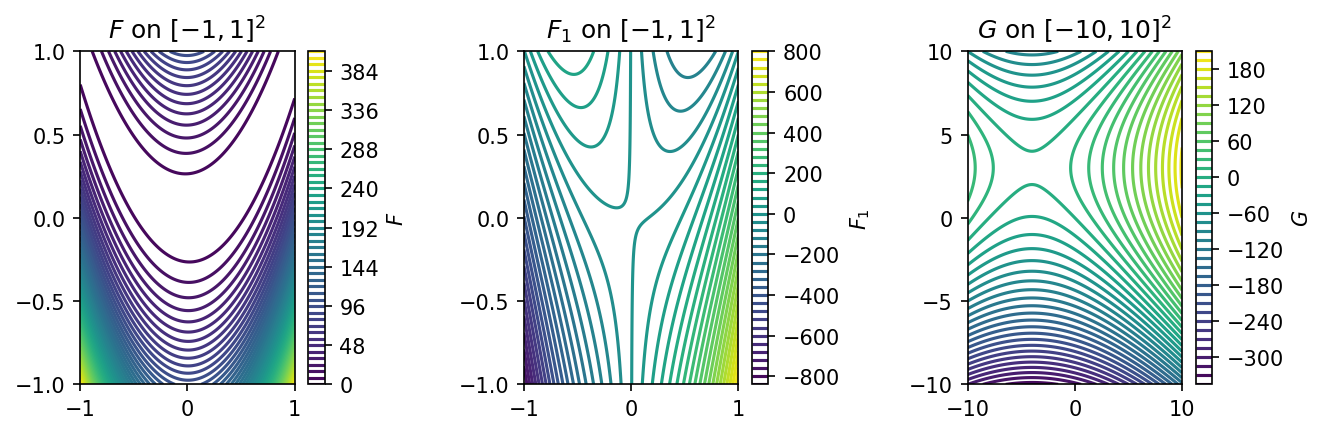

In [3]:
'''Solution problem 1.3; plotting contour plots of F and G'''

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import time

%matplotlib inline
mpl.rcParams['figure.dpi']= 150

def F(x1,x2):
    '''takes in a vector (x1,x2)^T and returns the Rosenbrock function/value of that point'''
    return 100*(x2 - x1**2)**2 + (1- x1)**2
def F1(x1,x2):
    return -400 * (x2 - x1**2)*x1 - 2*(1-x1)
def G(x1,x2):
    '''takes in av vector(x1,x2)^T and returns the value of the function G at that point'''
    return 8 * x1 + 12*x2 + x1**2 - 2* x2**2

#Arrays for F
x1 = np.linspace(-1,1,1000)
y1 = np.linspace(-1,1, 1000)
X1, Y1 = np.meshgrid(x1,y1)

#Arrays for G
x2 = np.linspace(-10,10,1000)
y2 = np.linspace(-10,10,1000)
X2 , Y2 = np.meshgrid(x2,y2)

#Plotting F
fig, axs = plt.subplots(1,3, figsize = (9,3))
im0 = axs[0].contour(x1,y1,F(X1,Y1), 50)
axs[0].set_title(r'$F$ on $[-1,1]^2$')
fig.colorbar(im0, ax = axs[0], label = r'$F$')

#Plotting F1
im1 = axs[1].contour(x1,y1,F1(X1,Y1), 50)
axs[1].set_title(r'$F_1$ on $[-1,1]^2$')
fig.colorbar(im1, ax = axs[1], label = r'$F_1$')

#Plotting G
im2 = axs[2].contour(x2,y2,G(X2,Y2),40)
axs[2].set_title(r'$G$ on $[-10,10]^2$')
fig.colorbar(im2, ax = axs[2], label = r'$G$')
plt.tight_layout()
plt.show()

Because of uncertainty in what $F_1$ means, I have plotted both for $F$ and for the the first element in the gradient of $F$, which I call $F_1$.

We observe that for $G$ the stationary point $[-4,3]^T$ is indeed a sadel point and not a local minimizer or maximizer. For $F$ and $F_1$ it looks as $[1,1]^T$ is a candidate for the minimizer, but this is not so obvious to see.

## Problem 2

Let $A \in \mathbb R^{n \times n}$ be symmetric.
The Rayleigh quotient $F\colon \mathbb R^n \to \mathbb R$ for $A$ is defined as
    
$$ F(\mathbf x) = \frac{\mathbf x^T\! A \mathbf x}{\lVert \mathbf x\rVert_2^2}.$$

The goal of this problem is to analyze Newton's method for finding minimizer (or stationary points) $\mathbf x^\ast$ of $F$ or in other words zeros of the gradient $\nabla F(\mathbf x) = \mathbf 0$.

To this end:

1. Compute the gradient $\nabla F$.
2. What are the stationary points $\mathbf x^\ast$ of $F$? What is the value of $F(\mathbf x^\ast)$ then?
3. Show that the Hessian matrix $\nabla^2 F$ (i.e. the Jacobian of the Gradient $\nabla F$) satisfies
   
   $$\nabla^2 F(\mathbf x) = \frac{2}{\lVert \mathbf x \rVert_2^2}
	\Bigl(I - 2 \frac{\mathbf x \mathbf x^T}{\lVert \mathbf x \rVert_2^2}\Bigr)
    \Bigl(A - F(\mathbf x) I\Bigr)
    \Bigl(I - 2 \frac{\mathbf x \mathbf x^T}{\lVert \mathbf x \rVert_2^2}\Bigr)$$
   
   _Hint_: Start with the directional derivative into a direction $z$, i.e. $(\nabla^2 F(x))z$.
4. Assume during the iterations of a the _Newton Method_ descent we reach nearly an Eigenvector of $A$.
   Then for $\mathbf x$ an Eigenvector we are looking for a descent direction by solving the Newton equation
    
   $$\nabla^2 F(\mathbf x) \, d = - \nabla F(\mathbf x)$$
   
   To what does the solution of this equation simplify in this case?
5. What does the Newton iteration look like for the situation in 4?
6. Interpret the result from 5 and analyze what the reason for this behavior is.

***Solution 2.1:***

We first observe that 
$$
F(\mathbf x) = \frac{\mathbf x^TA\mathbf x}{||\mathbf x||_2^2} = \frac{\mathbf x^TA\mathbf x}{\mathbf x^T\mathbf x}.
\\
$$

Let now $f = \mathbf x^TA\mathbf x$ and $g = \mathbf x^T\mathbf x$, then
$$
\nabla f = \nabla(\mathbf x^TA\mathbf) = \frac{\partial\mathbf x}{\partial\mathbf x}A\mathbf x +\frac{\partial\mathbf x}{\partial\mathbf x}A^T\mathbf x = A\mathbf x + A\mathbf x = 2A\mathbf x
$$
and 
$$
\nabla g = \nabla(\mathbf x^T \mathbf x) = \frac{\partial\mathbf x}{\partial\mathbf x}\mathbf x +\frac{\partial\mathbf x}{\partial\mathbf x}\mathbf x = \mathbf x + \mathbf x = 2\mathbf x,
$$
by using identities from matrix calculus. Then the gradient becomes

$$
\nabla F = \frac{g\nabla f - f\nabla g}{g^2} = \frac{\mathbf{x^Tx2Ax}- \mathbf{x^TAx2x}}{(\mathbf{x^Tx})^2} = \frac{2}{\mathbf{x^Tx}}\left(A\mathbf x - \frac{\mathbf x^TA\mathbf x}{\mathbf x^T\mathbf x}\mathbf x\right) = \frac{2}{\mathbf{x^Tx}}\left(A\mathbf x - F\mathbf x\right).
$$

***Solution 2.2:***

We look for stationary points $\mathbf x^*$ such that $\nabla F(\mathbf x^*) = 0$.

$$
\nabla F = 0 \iff \frac{2}{\mathbf{x^Tx}}\left(A\mathbf x - F\mathbf x\right) = 0
\\ \implies A\mathbf x - F\mathbf x = 0 \implies A\mathbf x = F\mathbf x.
$$

All $\mathbf x^*$ that satisfies $A\mathbf x^* = F(\mathbf x^*)\mathbf x^*$ are staionary points, but this is an eigenvector equation, meaning that all eigenvectors $x^*$ of $A$ with eigenvalue $F(\mathbf x^*)$ is stationary points. Meaning that in these points $F$ is an eiegnvalue of A.


***Solution 2.3:***

We look for the hessian $\nabla^2 F$, meaning we have to differentiate the gradient $\nabla F = \frac{2}{\mathbf{x^Tx}}\left(A\mathbf x - F\mathbf x\right)$ with respect to $\mathbf x$. Let now $\mathbf f = A\mathbf x - F\mathbf x$ and $g = \mathbf{x^Tx}$, then

$$
\nabla \mathbf f = \nabla(A\mathbf x - F\mathbf x) = \frac{\partial\mathbf x}{\partial\mathbf x}A^T  -F \frac{\partial\mathbf x}{\partial\mathbf x}-\nabla F \mathbf x^T = A - FI - \frac{2}{\mathbf{x^Tx}}(A\mathbf x - F \mathbf x)\mathbf x^T = A - FI - (A - FI)\frac{2}{\mathbf{x^Tx}}\mathbf{xx^T}
\\ = (A - FI)\left(I - \frac{2}{\mathbf{x^Tx}}\mathbf{xx^T}\right)
$$
and

$$
\nabla g = \nabla (\mathbf{x^Tx}) = 2x.
$$

We can now compute the hessian.

$$
\nabla^2F = 2\frac{g\nabla \mathbf f - \nabla (g) \mathbf f^T}{g^2} = 2 \frac{\mathbf{x^Tx}(A - FI)\left(I - \frac{2}{\mathbf{x^Tx}}\mathbf{xx^T}\right) - 2\mathbf x (A\mathbf x - F\mathbf x )^T}{(\mathbf{x^Tx})^2} = 2 \frac{\mathbf{x^Tx}(A - FI)\left(I - \frac{2}{\mathbf{x^Tx}}\mathbf{xx^T}\right) - 2\mathbf x (\mathbf x^TA - \mathbf x^T F )}{(\mathbf{x^Tx})^2} = 2 \frac{\mathbf{x^Tx}(A - FI)\left(I - \frac{2}{\mathbf{x^Tx}}\mathbf{xx^T}\right) - 2\mathbf{xx^T} (A - FI )}{(\mathbf{x^Tx})^2} 
\\= \frac{2}{\mathbf{x^Tx}}\left((A - FI)\left(I - \frac{2}{\mathbf{x^Tx}}\mathbf{xx^T}\right) - \frac{2}{\mathbf{x^Tx}}\mathbf{xx^T} (A - FI )\right)
\\ = \frac{2}{\|\mathbf x\|_2^2}\left((A - FI)\left(I - \frac{2}{\|\mathbf x\|_2^2}\mathbf{xx^T}\right) - \frac{2}{\|\mathbf x\|_2^2}\mathbf{xx^T} (A - FI )\right)
\\ = \frac{2}{\|\mathbf x\|_2^2}\left(A - FI - A \frac{2\mathbf{xx^T}}{\mathbf{x^Tx}} + F \frac{2\mathbf{xx^T}}{\mathbf{x^Tx}} - \frac{2\mathbf{xx^T}}{\mathbf{x^Tx}}A + F \frac{2\mathbf{xx^T}}{\mathbf{x^Tx}}\right)
\\ = \frac{2}{\|\mathbf x\|_2^2}\left( A - FI - A\frac{2\mathbf{xx^T}}{\mathbf{x^Tx}} - \frac{2\mathbf{xx^T}}{\mathbf{x^Tx}}A + 4F\frac{\mathbf{xx^T}}{\mathbf{x^Tx}}\right)
\\
= \frac{2}{\|\mathbf x\|_2^2}\left(I - \frac{2\mathbf{xx^T}}{\|\mathbf x\|_2^2}\right)\Bigl(A - FI\Bigr)\left(I - \frac{2\mathbf{xx^T}}{\|\mathbf x\|_2^2}\right).
$$

Which what was we the expression we wanted to find. We can show that the two last steps are indead equal by expanding the last expression.

$$
\left(I - \frac{2\mathbf{xx^T}}{\|\mathbf x\|_2^2}\right)\Bigl(A - FI\Bigr)\left(I - \frac{2\mathbf{xx^T}}{\|\mathbf x\|_2^2}\right)
\\ = \left[\left(I - \frac{2\mathbf{xx^T}}{\mathbf{x^Tx}}\right)\left(A - FI - (A - FI)\frac{2\mathbf{xx^T}}{\mathbf{x^Tx}}\right)\right]
\\= A - FI - A \frac{2\mathbf{xx^T}}{\mathbf{x^Tx}} + F \frac{2\mathbf{xx^T}}{\mathbf{x^Tx}} - \frac{2\mathbf{xx^T}}{\mathbf{x^Tx}} A + F \frac{2\mathbf{xx^T}}{\mathbf{x^Tx}} + \frac{2\mathbf{xx^T}}{\mathbf{x^Tx}}A\frac{2\mathbf{xx^T}}{\mathbf{x^Tx}} - F \frac{2\mathbf{xx^T}}{\mathbf{x^Tx}}\frac{2\mathbf{xx^T}}{\mathbf{x^Tx}}
\\ = A - FI - A \frac{2\mathbf{xx^T}}{\mathbf{x^Tx}} - \frac{2\mathbf{xx^T}}{\mathbf{x^Tx}}A + 4F\frac{\mathbf{xx^T}}{\mathbf{x^Tx}} + 4F \frac{\mathbf{xx^T}}{\mathbf{x^Tx}} - 4F \frac{\mathbf{xx^T}}{\mathbf{x^Tx}}
\\ = A - FI - A\frac{2\mathbf{xx^T}}{\mathbf{x^Tx}} - \frac{2\mathbf{xx^T}}{\mathbf{x^Tx}}A + 4F\frac{\mathbf{xx^T}}{\mathbf{x^Tx}}.
$$

Thus the expressions are equal and the hessian is indeed

$$
\nabla^2F = \frac{2}{\|\mathbf x\|_2^2}\left(I - \frac{2\mathbf{xx^T}}{\|\mathbf x\|_2^2}\right)\Bigl(A - FI\Bigr)\left(I - \frac{2\mathbf{xx^T}}{\|\mathbf x\|_2^2}\right).
$$

***Solution 2.4:***

If we are nearly by an eigenvector of A then $\nabla F \approx 0$ since this is a stationary point of $F$ and $F \approx \lambda$ eigenvalue of $A$; $A\mathbf x = F\mathbf x = \lambda \mathbf x$. Then the equation simplifies to  
$$
\nabla^2 F d = 
\frac{2}{\lVert \mathbf x \rVert_2^2}
	\Bigl(I - 2 \frac{\mathbf x \mathbf x^T}{\lVert \mathbf x \rVert_2^2}\Bigr)
    \Bigl(A - \lambda I\Bigr)
    \Bigl(I - 2 \frac{\mathbf x \mathbf x^T}{\lVert \mathbf x \rVert_2^2}\Bigr)d = 0
\\\Bigl(I - 2 \frac{\mathbf x \mathbf x^T}{\lVert \mathbf x \rVert_2^2}\Bigr)
    \Bigl(A - \lambda I\Bigr)
    \Bigl(I - 2 \frac{\mathbf x \mathbf x^T}{\lVert \mathbf x \rVert_2^2}\Bigr)d = 0  
\\\left(A - 2A\frac{\mathbf{xx^T}}{\mathbf{x^Tx}} - \lambda I + 2\lambda\frac{\mathbf{xx^T}}{\mathbf{x^Tx}}- 2\frac{\mathbf{xx^T}A}{\mathbf{x^Tx}}+ 4 \frac{\mathbf{xx^T}A\mathbf{xx^T}}{\mathbf{x^Txx^Tx}} + 2\lambda\frac{\mathbf{xx^T}}{\mathbf{x^Tx}}- 4 \lambda\frac{\mathbf{xx^Txx^T}}{\mathbf{x^Txx^Tx}}\right)d = 0
$$

Using that $Ax = \lambda \mathbf x$ and that $\mathbf x^TA = \mathbf x^TA^T = (A\mathbf x)^T = (\lambda \mathbf x)^T = \mathbf x^T \lambda$ ,we get that

$$
\left(A - 2\lambda\frac{\mathbf{xx^T}}{\mathbf{x^Tx}} - \lambda I + 2\lambda\frac{\mathbf{xx^T}}{\mathbf{x^Tx}}- 2\lambda\frac{\mathbf{xx^T}}{\mathbf{x^Tx}}+ 4 \lambda\frac{\mathbf{xx^T}\mathbf{xx^T}}{\mathbf{x^Txx^Tx}} + 2\lambda\frac{\mathbf{xx^T}}{\mathbf{x^Tx}}- 4 \lambda\frac{\mathbf{xx^Txx^T}}{\mathbf{x^Txx^Tx}}\right)d = 0
\\
\\\implies (A - \lambda I )d = 0.
$$

Meaning that $d$ is an eigenvector, with same eigenvalue $\lambda$ as $\mathbf x$, of $A$.

***Solution 2.5:***

The newton iteration for case 4 becomes

$$
\mathbf x_{n+1} = \mathbf x_n - \left[\nabla^2 F(\mathbf x_n)\right]^{-1}\nabla F(\mathbf x_n) = \mathbf x_n + d.
$$

Where $d$ is an eigenvector of $A$ with eigenvalue $F(\mathbf x_n)$ because $\nabla F(\mathbf x_n) \approx 0$.

***Solution 2.6:***

The goal of the Newton Method descent is to find stationary points such that $\nabla F = 0$, thus if we are nearly by an eigenvector of $A$ then we are as shown previously nearly by a stationary point. Which means that our scheme has reached its goal, but since we ask our scheme to continue (i.e very small tolerance limit) we get a direction $d$ towards the next solution. Which is $\mathbf x_{n+1} = \mathbf x_n + d$. Now if $\nabla F(\mathbf x_n) \approx 0 \implies A\mathbf x_n - F(\mathbf x_n)\mathbf x_n = 0$ then,


$$
\\
F(\mathbf x_n + d) = \frac{(\mathbf x_n+ d)^TA(\mathbf x_n+ d)}{(\mathbf x_n + d)^T(\mathbf x_n+ d)} = \frac{(\mathbf x_n^T+ d^T)(A\mathbf x_n+ Ad)}{(\mathbf x_n^T+ d^T)(\mathbf x_n+ d)}
$$
Set $A\mathbf x_n = F(\mathbf x_n)\mathbf x_n = F \mathbf x_n$
$$
\\\implies \frac{\mathbf x_n^TF\mathbf x_n + \mathbf x_n^TFd + d^TF\mathbf x_n + d^TFd}{\mathbf x_n^T\mathbf x_n + \mathbf x_n^Td + d^T\mathbf x_n + d^Td} = F(\mathbf x_n).
\\
\implies \nabla F(\mathbf x_n + d) = \frac{2}{(\mathbf x_n + d)^T\mathbf x_n + d}\left[A(\mathbf x_n + d) - F(\mathbf x_n + d)[\mathbf x_n + d]\right] 
\\= \frac{2}{(\mathbf x_n + d)^T\mathbf x_n + d}\left(A\mathbf x_n + Ad - F(\mathbf x_n)\mathbf x_n- F(\mathbf x_n) d\right) \approx 0
$$

Thus the solution $\mathbf x_{n+1} = \mathbf x_n + d$ is a solution to our problem, just a different solution than the eigenvector $\mathbf x_n$. However this is not a wanted effect, because then our iteration will never stop, since we don't get anny closer to zero than we was at $\mathbf x_n$, and our solution $\mathbf x_{n+1}$ will become very large. Therefore we must not choose a too strict tolerance limit, since else the iteration will never converge. 

## Problem 3

1. Implement a generic (simple) Newton iteration function of the form

       def my_newton(f, Df, x0, **kwargs)

   To look for a zero of the univariate function $f\colon \mathbb R \to \mathbb R$.
   Hence the function performs the newton iteration for `f` and its derivative `Df` starting from `x0` performing `maxiter` steps, where `maxiter` is a keyword argument from `**kwargs`.
   Provide a suitable default if no `maxiter` keyword is given.

2. Extend the function from the first part of this problem with an additional keyword `tol` to stop, if $\lvert f(x_k)\rvert$ is smaller in absolute value than the tolerance `tol`.
   What is a good default here to make the function work the same as in 1, i.e. that the default behavior (from 1) is not changed by this additional keyword?

3. Document the function properly.

4. Write at least two tests with simple functions. One should end with `maxiter` iterations, the other with a tolerance stop.


In [4]:
def my_newton(f,Df,x0,maxiter = 1e4,tol = 1e-4):
    """
    my_newton(f,Df,x0,maxiter = 1e4,tol = 1e-4)
    Calculate the roots of a function f by using newton's method
    
    input:
    f = function for which you want to find the root of
    Df = derivative of f
    x0 = Starting value
    maxiter = maximum iterations, default value of 10 000
    tol = tolerance limit of the function value, defualt value of 0.00001
    
    output:
    x = the root of f(x)
    i = number of iterations
    error = the error in the method, i.e the norm of f(x)
    """
    x = x0
    i = 0
    error = np.linalg.norm(f(x))
    
    while i!= maxiter and error > tol:
        x = x - f(x)/Df(x)
        i+=1
        error = np.linalg.norm(f(x))
    
    return x, i, error



In [5]:
def f1(x):
    '''Simple function used in testing of my_newton()'''
    return x**2 - 2*x -1
def Df1(x):
    '''Derivitave of f1 used in testing my_newton()'''
    return 2*x - 2

x, i, error = my_newton(f1,Df1,0)
print(f"x = {x}\niterations: {i}\nError: {error}")

x = -0.41421568627450983
iterations: 3
Error: 6.007304882871267e-06


We observe that with a function $f_1(x) = x^2 - 2x -1$ which have real roots we find one quickly and the iterations ge stopped by the tolerance limit.

In [6]:

def f2(x):
    '''Simple function used in testing of my_newton()'''
    return x**2 + 1

def Df2(x):
    '''Derivitave of f2 used in testing my_newton()'''
    return 2*x

x, i, error = my_newton(f2,Df2,3)
print(f"x = {x}\niterations: {i}\nError: {error}")

x = -0.15122846694664172
iterations: 10000
Error: 1.0228700492150316


With a function that does not have a real root, we never reaches the tolerance limit and get stopped when the number of iterations reach the maxiter limit. 

## Problem 4

1. Write a function that uses `my_newton(f, Df, x0)` from Problem 3 to run the newton iteration on a grid of possible starting values from the complex square

   $$ \bigl\{x + \mathrm{i}y\ \big|\ -1 \leq x,y \leq 1\bigr\} $$

   sampled equidistantly on `n` points. For example for $n=3$ you get $\{-1+\mathrm{i}, \mathrm{i}, 1+\mathrm{i}, -1, 0, 1, -1-\mathrm{i}, -\mathrm{i}, -\mathrm{i}-1\}$ which are arranged in a mesh $x_{0,0},...,x_{2,2}$.
   
   **Obs!** Python uses `j` for the complex unit.
   
   In total, your function should be of the form
   
       eval_newton(f,Df,n)

   and should return an `n`-by-`n` array `A`, that is $A=(a_{ij})$, where $i,j=1,\ldots,n$, of resulting values from the $n^2$ Newton iteration runs.
   
2. How can we formulate the solution of $z^3 = 1$, where $z \in \mathbb C$ as a problem that fits our setting here? State $f$ and $f'$ accordingly.
   If you now run `eval_newton(f,Df,n)` for example for `n=256`, how many different solutions do you expect?
   Let $m$ be the answer to that question. Choose $m$ favourite colors and create an image with $n\times n$ pixel, where a pixel gets the $k$th color if it converges to the $k$th of the solutions you have. Save/display this image in this notebook. If your code is fast enough, do this with `n=1024` instead. 

3. Similarly to the last point, solve the equation $z^5 = 1$ using `eval_newton`, again with `n=256` (or `n=1024` if you dare) for a maximal number of iterations (a) of $5$ and (b) of $15$.
   
   From each of the resulting arrays $A$ we again create an images. We proceed as follows:
   Since a trivial solution of $z^5=1$ is $z_0=1$, we want to see the difference in _angle_ to this solution. Note that $z_0$ itself has an angle of $0$ in polar coordinates in the complex plane.
   
   Compute and visualize the phase (angle) of a resulting value to $z_0$ (see `numpy.angle`) of each result $a_{ij}\in \mathbb C$ in both arrays and use this angle as a value in the image.

In [7]:
'''Solution 4.1'''
def eval_newton(f,Df,n, maxiter = 1e3):
    '''
    eval_newton(f,Df,n,maxiter)
    Evaluate newtons method on f with n different complex startingvalues on [-1,1]x[-1,1]
    
    input:
    f: function to evaluate
    Df: The derivative of f
    n: number of startingvalues
    maxiter: number of maximum iterations, default value at 1000
    
    output:
    A: nxn-matrix with results from the newton_iteration
    xx: array on meshgrid form with the real part
    yy: array on meshgrid form with the imaginary part
    prints time used and some statistics about the calculation
    '''
    t1 = time.time()
    
    x = np.linspace(-1,1,n)
    xx,yy = np.meshgrid(x,x*1j)
    zz = xx + yy
    
    A, ite, error = my_newton(f,Df,zz,maxiter = maxiter)
    
    t2 = time.time()
    print(f'Time used: {round(t2 - t1,2)}s     Iterations: {ite}')
    return A,xx,yy

If $z^3 = 1$ then $z^3 -1 = 0$, thus we can use newtons method on a function $f(z) = z^3 -1$ to solve the equation. This is a polynomial of degree 3, therefore after the fundemental theorem of algebra we expect $m =  3$ solutions: 
$$z = (1,-(-1)^{1/3}, (-1)^{2/3}) \approx (1 + 0i, -0.5 -0.86i, -0.5 + 0.86 i) = (e^{0i}, 0.99e^{1.044i}, 0.99e^{-1.044i}).$$

We see difference in the solutions by looking at the angles, then we don't have to deal with complex numbers when making our picture.


In [8]:
'''Solution 4.2'''
def f(z):
    """Function used to solve z^3 = 1 with newtons method, returns z^3 - 1"""
    return z**3 - 1

def Df(z):
    """Returns derivative of f"""
    return 3*z**2 

n = 1024 #Setting number of values
sol,xx,yy = eval_newton(f,Df,n) #Using eval_newton to solve problem with n different starting values

Time used: 8.45s     Iterations: 55


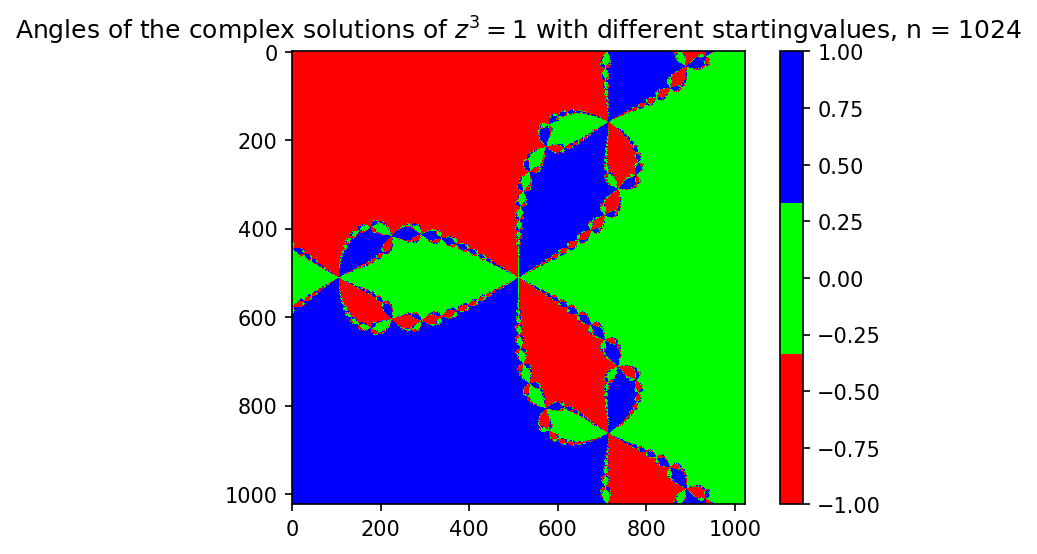

In [9]:
'''Plotting the solutions with 3 different number of iterations:'''

from matplotlib.colors import LinearSegmentedColormap #Used to create colormaps

#Plotting the phase of the solutions to z^3 = 1
colors = ['r', 'lime', 'b']  #Three colors
cmap = LinearSegmentedColormap.from_list('my_list', colors, N=3) #Creating colormap with three colors


plt.figure()
plt.imshow(np.angle(sol), cmap = cmap, vmin = -np.abs(sol.max()), vmax = np.abs(sol.max()))
plt.colorbar()
plt.title(r'Angles of the complex solutions of $z^3 = 1$ with different startingvalues, n = 1024')
plt.show()


In [10]:
'''Solution 4.3:'''
def g(z):
    '''Simple function used to solve z^5 = 1 with newtons method, returning z^5 - 1'''
    return z**5 - 1
def Dg(z):
    """Simple function used to solve z^5 = 1 with newtons method, returning the derivative of g(z)"""
    return 5*z**4

n = 1024 #Number of starting values
gSolA, xx, yy = eval_newton(g,Dg,n, maxiter = 5) #Solves z^5 = 1 with a different number of iterations
gSolB, xx, yy = eval_newton(g,Dg, n, maxiter = 15)
gSolC, xx, yy = eval_newton(g,Dg, n, maxiter = 100)


Time used: 1.2s     Iterations: 5
Time used: 3.67s     Iterations: 15
Time used: 23.55s     Iterations: 100


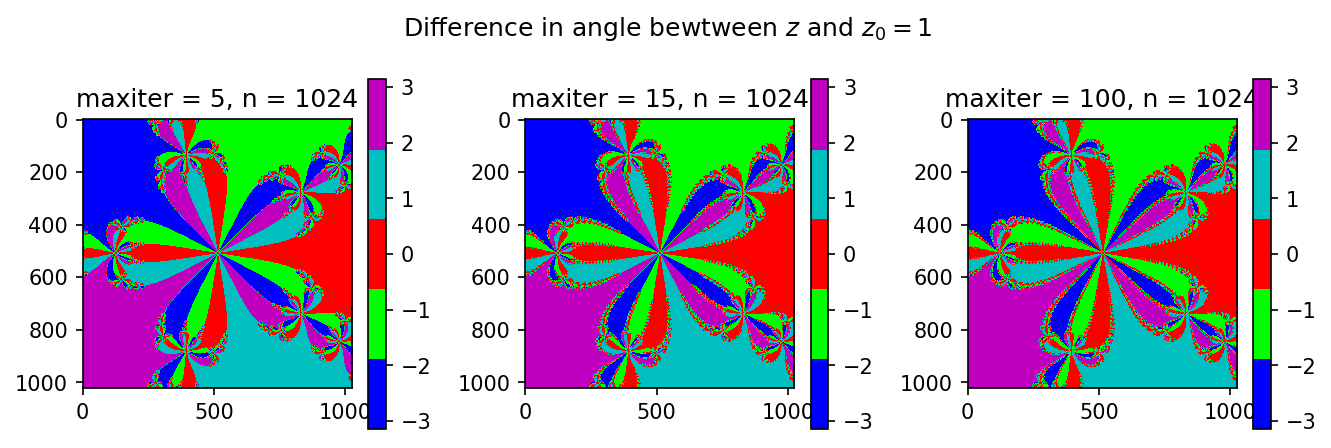

In [11]:
'''Plotting the solutions with 3 different number of iterations:'''

colors = ['b', 'lime', 'r', 'c', 'm'] #Set of 5 colors
cmap =  LinearSegmentedColormap.from_list('my_list', colors, N=5) #Creating colormap

fig, axs = plt.subplots(1,3, figsize = (9,3)) #making subplots
#Plotting for maxiter = 5
im0 = axs[0].imshow(np.angle(gSolA), cmap = cmap, vmin = -np.abs(np.angle(gSolA).max()), vmax = np.abs(np.angle(gSolA).max()))
fig.colorbar(im0,ax = axs[0])
axs[0].set_title(r'maxiter = 5, n = 1024')

#Plotting maxiter = 15
im1 = axs[1].imshow(np.angle(gSolB), cmap = cmap,vmin = -np.abs(np.angle(gSolB).max()), vmax = np.abs(np.angle(gSolB).max()) )
fig.colorbar(im1,ax = axs[1])
axs[1].set_title(r'maxiter = 15, n = 1024')

#Plotting for maxiter = 100 for even more detailed picture
im2 = axs[2].imshow(np.angle(gSolC), cmap = cmap,vmin = -np.abs(np.angle(gSolC).max()), vmax = np.abs(np.angle(gSolC).max()) )
fig.colorbar(im2,ax = axs[2])
axs[2].set_title(r'maxiter = 100, n = 1024')


fig.suptitle(r'Difference in angle bewtween $z$ and $z_0  = 1$')
plt.tight_layout()
plt.show()